In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a* x **b
        
        return y_fit-y

In [3]:
dataBase_path = r'./'
dataBase_file = r'../UUVDatabase.xlsx'
linkage_file = r'Linkage_data.xlsx'

In [4]:
data_path = Path(dataBase_path, dataBase_file)
bcfDF = pd.read_excel(data_path, sheet_name = 'BCF')
mpfDF = pd.read_excel(data_path, sheet_name='MPF')
liftDF = pd.read_excel(data_path, sheet_name="LiftBased")

In [5]:
bcf_cot = bcfDF[bcfDF['COTopt [J/m]'].notnull()]
mpf_cot = mpfDF[mpfDF['COTopt [J/m]'].notnull()]
lift_cot = liftDF[liftDF['COTopt [J/m]'].notnull()]

# sort the column values in ascending order
bcf_cot = bcf_cot.sort_values('Weight [kg]')
mpf_cot = mpf_cot.sort_values('Weight [kg]')
lift_cot = lift_cot.sort_values('Weight [kg]')

# drop all rows with nan values
bcf_cot.dropna(subset=['Weight [kg]'], inplace=True)
mpf_cot.dropna(subset=['Weight [kg]'], inplace=True)
lift_cot.dropna(subset=['Weight [kg]'], inplace=True)

In [6]:
# break up the data frame into perspective locomotion modes
bcf_modes = bcf_cot['Locomotion'].unique()
mpf_modes = mpf_cot['Locomotion'].unique()
lift_modes = lift_cot['Locomotion'].unique()

bcf_dfs = [bcf_cot[bcf_cot['Locomotion']==mode] for mode in bcf_modes]
mpf_dfs = [mpf_cot[mpf_cot['Locomotion']==mode] for mode in mpf_modes]
lift_dfs = [lift_cot[lift_cot['Locomotion']==mode] for mode in lift_modes]

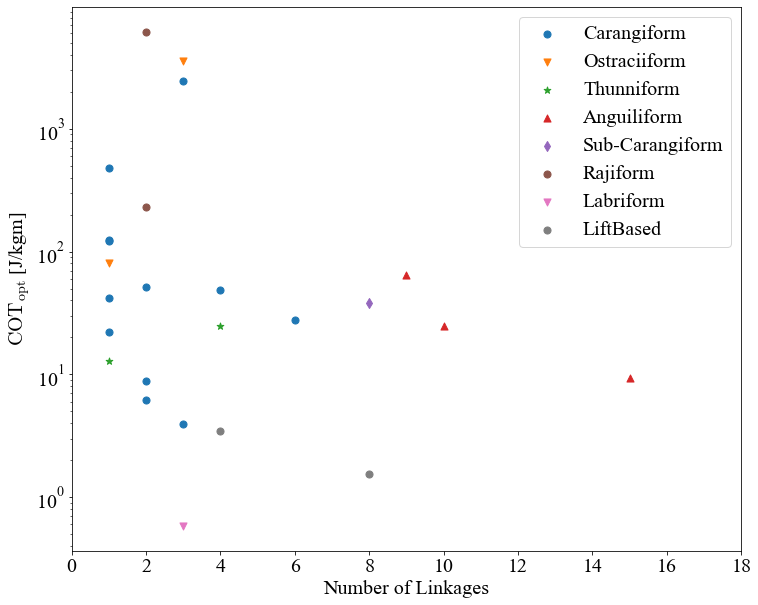

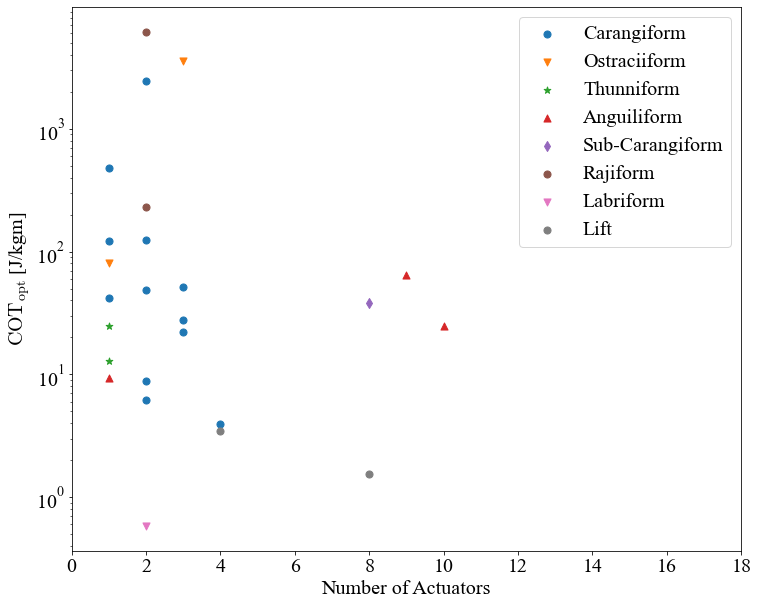

In [7]:
marker_size=50
fit_method = 'least_squares'

markers = ['o', 'v', '*', '^', 'd']


# plot COT and Number of actuators
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w')
fig2, ax2 = plt.subplots(figsize=(12,10), facecolor='w')

for i, mode in enumerate(bcf_modes):
    ax1.scatter(bcf_dfs[i]['No Linkages'], bcf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)
    ax2.scatter(bcf_dfs[i]['No Actuators'], bcf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)

for i, mode in enumerate(mpf_modes):       
    ax1.scatter(mpf_dfs[i]['No Linkages'], mpf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)
    ax2.scatter(mpf_dfs[i]['No Actuators'], mpf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)

for i, mode in enumerate(lift_modes):
    ax1.scatter(lift_dfs[i]['No Linkages'], lift_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)
    ax2.scatter(lift_dfs[i]['No Actuators'], lift_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label='Lift')
    
ax1.set_xlabel('Number of Linkages')
ax1.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax1.set_xticks(np.arange(0, 20, 2))
ax1.set_yscale('log')
#ax1.grid(which='both', linestyle='--')
ax1.legend()

ax2.set_xlabel('Number of Actuators')
ax2.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax2.set_xticks(np.arange(0, 20, 2))
ax2.set_yscale('log')
#ax2.grid(which='both', linestyle='--')
ax2.legend()
fig1.savefig('uuv_cot_linkages.pdf', facecolor='w', dpi=300, bbox_inches='tight')
fig2.savefig('uuv_cot_actuators.pdf', facecolor='w', dpi=300, bbox_inches='tight')

In [8]:
data_path = Path(dataBase_path, linkage_file)
xlsx = pd.ExcelFile(data_path)
sheets = xlsx.sheet_names

linkage_dfs = [pd.read_excel(xlsx, sheet_name=sheet) for sheet in sheets]

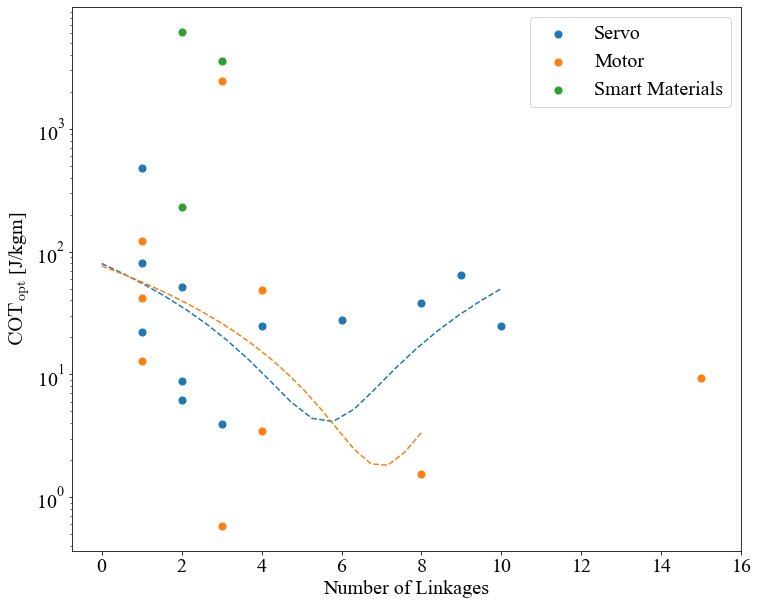

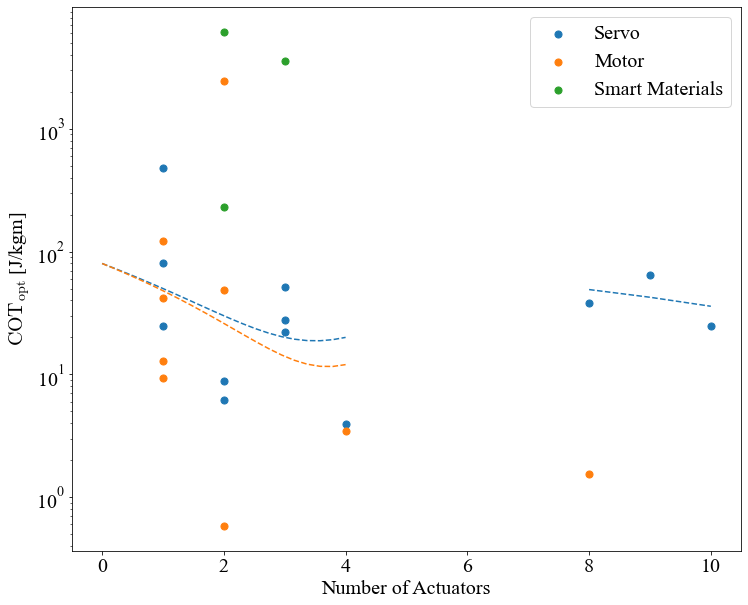

In [11]:
fig3, ax3 = plt.subplots(figsize=(12,10), facecolor='w')
fig4, ax4 = plt.subplots(figsize=(12,10), facecolor='w')

for i, name in enumerate(sheets):
    if name != 'Master' and name != 'Rigid Tail' and name != 'Compliant Tail':
        linkage_dfs[i].sort_values('No Linkages', inplace=True)
        if name == 'Servo':
            dx = np.linspace(0, 10, 20)
            dy = 2.4*dx**2 + -27*dx + 80

            ax3.scatter(linkage_dfs[i]['No Linkages'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', color='C0', s=marker_size, label=name)
            ax3.plot(dx, dy, 'C0--')
        elif name == 'Motor':
            data = linkage_dfs[i][linkage_dfs[i]['No Linkages'] <= 9]
            data = data[data['COTopt [J/kgm]'] < 1e3]
            fit = np.polyfit(data['No Linkages'].values, data['COTopt [J/kgm]'].values, 2)
            poly = np.poly1d(fit)   
            dx = np.linspace(0, 8, 20)

            ax3.scatter(linkage_dfs[i]['No Linkages'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', color='C1', s=marker_size, label=name)
            ax3.plot(dx, poly(dx), 'C1--')
        else:
            ax3.scatter(linkage_dfs[i]['No Linkages'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', color='C2', s=marker_size, label=name)

for i, name in enumerate(sheets):
    if name != 'Master' and name != 'Rigid Tail' and name != 'Compliant Tail':
        linkage_dfs[i].sort_values('No Actuators', inplace=True)
        if name == 'Servo':
            low = linkage_dfs[i][linkage_dfs[i]['No Actuators'] <= 6]
            high = linkage_dfs[i][linkage_dfs[i]['No Actuators'] > 6]

            dx = np.linspace(0, 4, 20)
            dy = 5*dx**2 - 35*dx + 80

            fit_high = np.polyfit(high['No Actuators'].values, high['COTopt [J/kgm]'].values, 1)
            poly_high = np.poly1d(fit_high)

            ax4.scatter(linkage_dfs[i]['No Actuators'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', s=marker_size, color='C0', label=name)
            ax4.plot(dx, dy, 'C0--')
            ax4.plot(high['No Actuators'].values, poly_high(high['No Actuators'].values), 'C0--')
        elif name == 'Motor':
            data = linkage_dfs[i][linkage_dfs[i]['No Actuators'] <= 7]
            data = data[data['COTopt [J/kgm]'] < 1e3]
            
            dx = np.linspace(0, 4, 20)
            dy = 5*dx**2 - 37*dx + 80

            ax4.scatter(linkage_dfs[i]['No Actuators'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', color='C1', s=marker_size, label=name)
            ax4.plot(dx, dy, 'C1--')
        else:
            ax4.scatter(linkage_dfs[i]['No Actuators'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', color='C2', s=marker_size, label=name)

ax3.set_xlabel('Number of Linkages')
ax3.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax3.set_xticks(np.arange(0, 18, 2))
#ax3.set_ylim([-10, 125])
#ax3.grid(which='both', linestyle='--')
ax3.legend()
ax3.set_yscale('log')

ax4.set_xlabel('Number of Actuators')
ax4.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax4.set_xticks(np.arange(0, 12, 2))
#ax4.set_ylim([-10, 125])
#ax4.grid(which='both', linestyle='--')
ax4.legend()
ax4.set_yscale('log')
fig3.savefig('motor_cot_linkages.pdf', facecolor='w', dpi=300, bbox_inches='tight')
fig4.savefig('motor_cot_actuators.pdf', facecolor='w', dpi=300, bbox_inches='tight')

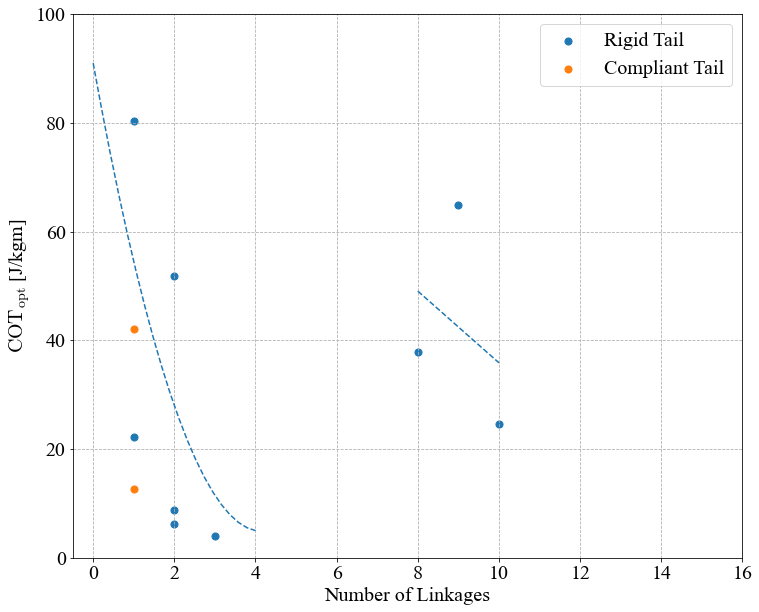

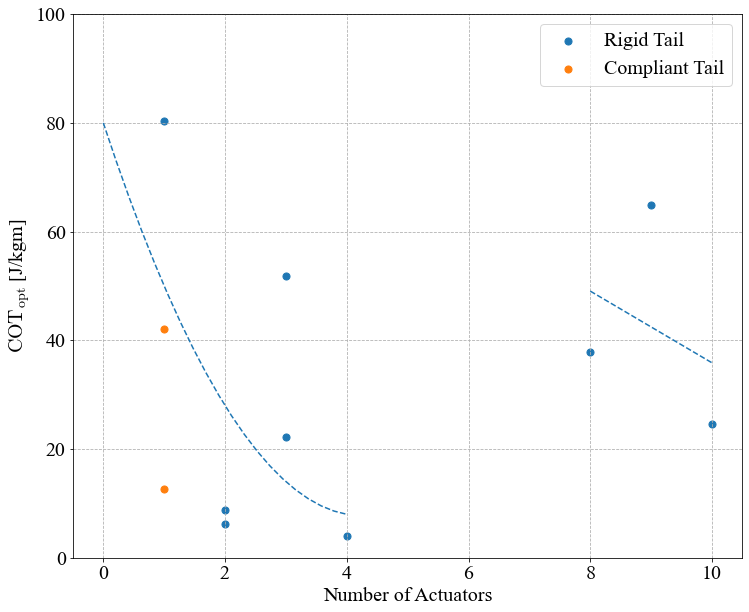

In [10]:
fig5, ax5 = plt.subplots(figsize=(12,10), facecolor='w')
fig6, ax6 = plt.subplots(figsize=(12,10), facecolor='w')

for i, name in enumerate(sheets):
    if name == 'Rigid Tail':
        linkage_dfs[i].sort_values(by=['No Linkages'], inplace=True)
        low = linkage_dfs[i][linkage_dfs[i]['No Linkages'] <= 6]
        high = linkage_dfs[i][linkage_dfs[i]['No Linkages'] > 6]

        fit_low = np.polyfit(low['No Linkages'].values, low['COTopt [J/kgm]'].values, 2)
        poly_low = np.poly1d(fit_low)
        dx = np.linspace(0, 4, 20)
        dy = 5.0*dx**2 - 41.5*dx + 91

        fit_high = np.polyfit(high['No Linkages'].values, high['COTopt [J/kgm]'].values, 1)
        poly_high = np.poly1d(fit_high)

        ax5.scatter(linkage_dfs[i]['No Linkages'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', s=marker_size, color='C0', label=name)
        ax5.plot(dx, dy, 'C0--')
        ax5.plot(high['No Linkages'].values, poly_high(high['No Linkages'].values), 'C0--')
    
    if name == 'Compliant Tail':
        ax5.scatter(linkage_dfs[i]['No Linkages'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', s=marker_size, color='C1', label=name)

for i, name in enumerate(sheets):
    if name == 'Rigid Tail':
        linkage_dfs[i].sort_values(by=['No Actuators'], inplace=True)

        low = linkage_dfs[i][linkage_dfs[i]['No Actuators'] <= 6]
        high = linkage_dfs[i][linkage_dfs[i]['No Actuators'] > 6]

        fit_low = np.polyfit(low['No Actuators'].values, low['COTopt [J/kgm]'].values, 2)
        poly_low = np.poly1d(fit_low)
        dx = np.linspace(0, 4, 20)
        dy = 4.0*dx**2 - 34*dx + 80

        fit_high = np.polyfit(high['No Actuators'].values, high['COTopt [J/kgm]'].values, 1)
        poly_high = np.poly1d(fit_high)

        ax6.scatter(linkage_dfs[i]['No Actuators'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', s=marker_size, color='C0', label=name)
        ax6.plot(dx, dy, 'C0--')
        ax6.plot(high['No Actuators'].values, poly_high(high['No Actuators'].values), 'C0--')
    
    if name == 'Compliant Tail':
        ax6.scatter(linkage_dfs[i]['No Actuators'], linkage_dfs[i]['COTopt [J/kgm]'], marker='o', s=marker_size, color='C1', label=name)

ax5.set_xlabel('Number of Linkages')
ax5.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax5.set_xticks(np.arange(0, 18, 2))
ax5.set_ylim([0, 100])
ax5.grid(which='both', linestyle='--')
ax5.legend()
#ax5.set_yscale('log')

ax6.set_xlabel('Number of Actuators')
ax6.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax6.set_xticks(np.arange(0, 12, 2))
ax6.set_ylim([0, 100])
ax6.grid(which='both', linestyle='--')
ax6.legend()
#ax6.set_yscale('log')
fig5.savefig('rigid_cot_linkages.pdf', facecolor='w', dpi=300, bbox_inches='tight')
fig6.savefig('rigid_cot_actuators.pdf', facecolor='w', dpi=300, bbox_inches='tight')